In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('gene_high_throughput_sequencing.csv')


In [4]:
data.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


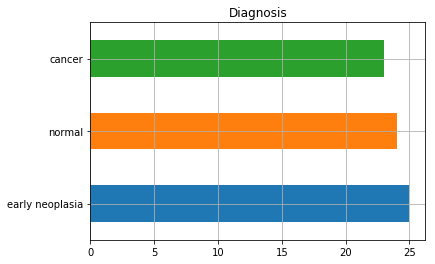

In [5]:
data['Diagnosis'].value_counts().plot(kind='barh', grid=True, title="Diagnosis")
plt.show()

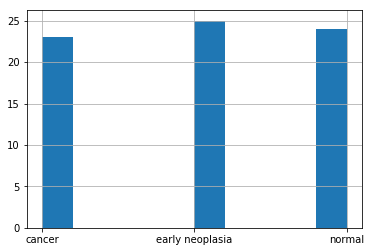

In [6]:
data['Diagnosis'].hist()
plt.show()

In [7]:
df_normal=data[data['Diagnosis']=='normal']
df_early_neoplasia=data[data['Diagnosis']=='early neoplasia']
df_cancer=data[data['Diagnosis']=='cancer']

In [8]:
print (df_normal.shape)
print (df_early_neoplasia.shape)
print (df_cancer.shape)

(24, 15750)
(25, 15750)
(23, 15750)


In [9]:
df_1=pd.DataFrame(np.array([np.mean(df_normal), np.mean(df_early_neoplasia), np.mean(df_cancer)]).transpose(), 
             index=np.mean(df_normal).index, columns=["normal", "early neoplasia", "cancer"])

In [10]:
df_1.head()

,normal,early neoplasia,cancer
LOC643837,2.681277,2.510894,2.186060
LOC100130417,4.368497,8.721781,8.190456
SAMD11,15.159566,18.531325,23.692614
NOC2L,15.374351,15.071854,16.468034
KLHL17,21.459886,24.152469,25.035813


In [11]:
list_of_genes = list(data.columns)[2:]

In [12]:
count = 0
for i in list_of_genes:
    if scipy.stats.ttest_ind(df_normal[i], df_early_neoplasia[i], equal_var = False).pvalue < 0.05:
        count+=1
print(count)

1575


## Dear Senior, look, please, text below

### :)))

In [13]:
array = []
for i in list_of_genes:
    t, p = scipy.stats.ttest_ind(df_normal[i], df_early_neoplasia[i], equal_var = False)
    array.append([i, t, p])
df_new = pd.DataFrame(array, columns = ['gene', 't-value', 'pvalue'])


In [14]:
df_new.head()

,gene,t-value,pvalue
0,LOC643837,0.400289,0.690766
1,LOC100130417,-4.608766,0.000032
2,SAMD11,-1.929277,0.060273
3,NOC2L,0.220542,0.826429
4,KLHL17,-2.013201,0.049876


In [15]:
(df_new.pvalue<0.05).value_counts()

False    14173
True      1575
Name: pvalue, dtype: int64

In [16]:
import statsmodels.stats.multitest as smm
from statsmodels.sandbox.stats.multicomp import multipletests

In [31]:
reject, p_corrected, a1, a2 = multipletests(df_new.pvalue, alpha=0.05/2, method='holm')

In [32]:
df_new['p_corrected']=p_corrected
df_new['reject']=reject

In [33]:
df_new.head()

,gene,t-value,pvalue,p_corrected,reject
0,LOC643837,0.400289,0.690766,1.000000,False
1,LOC100130417,-4.608766,0.000032,0.500174,False
2,SAMD11,-1.929277,0.060273,1.000000,False
3,NOC2L,0.220542,0.826429,1.000000,False
4,KLHL17,-2.013201,0.049876,1.000000,False


In [34]:
df_new.reject.value_counts()

False    15746
True         2
Name: reject, dtype: int64

In [35]:
df_new[df_new.reject == True].sort_values(by = 't-value', ascending=False).head()

,gene,t-value,pvalue,p_corrected,reject
7244,PCSK4,-5.806801,7.955435e-07,0.012527,True
9820,EEF1A2,-6.524922,8.498742e-08,0.001338,True


In [26]:
reject, p_corrected, a1, a2 = multipletests(df_new.pvalue, alpha=0.05, method='fdr_bh')

In [27]:
df_new['p_corrected']=p_corrected
df_new['reject']=reject

In [30]:
df_new.head()

,gene,t-value,pvalue,p_corrected,reject
0,LOC643837,0.400289,0.690766,0.966511,False
1,LOC100130417,-4.608766,0.000032,0.035698,True
2,SAMD11,-1.929277,0.060273,0.536103,False
3,NOC2L,0.220542,0.826429,0.980777,False
4,KLHL17,-2.013201,0.049876,0.499016,False


In [28]:
df_new.reject.value_counts()

False    15714
True        34
Name: reject, dtype: int64

In [29]:
df_new[df_new.reject == True].sort_values(by = 't-value', ascending=False).head()

,gene,t-value,pvalue,p_corrected,reject
3884,CCDC42B,4.725397,0.000033,0.035698,True
1426,PIGR,4.629490,0.000044,0.036654,True
11428,SLC34A2,4.477964,0.000054,0.038815,True
12741,HLA-B,4.450766,0.000052,0.038815,True
9428,SIRPA,4.390986,0.000083,0.045373,True
